<a href="https://colab.research.google.com/github/ialara/or-student/blob/main/TA_Sessions/HW3_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SIMULATION HOMEWORK 3

Due: In class on Friday, May 27, 2022

Name: **Answer Key**

Overall score: ?? / 24 pts

#### 1.	[8 points] Consider the following integral: 
$$z=\int_1^4 \int_\sqrt{(x)}^{x^2} ye^x dy dx$$

In both of these problems use 100 replication with averages of 50 samples.  

a) Create a simulation using the probability estimating (dart) approach. [3 pts]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(2020)

reps = 100
samples = 50

## The "box" encapsulating the domain of integration
xmin = 1
xmax = 4
ymin = 1
ymax = 16

In [ ]:
def integrand(x, y):
    return y*np.exp(x)

xspace = np.arange(xmin, xmax + 0.0001, 0.001)
yspace = np.linspace(ymin, ymax, len(xspace))

## Note: Because z is monotonically increasing in both x and y,
## you could just do zmax = integrand(xmax, ymax)
zmax = np.max(integrand(xspace, yspace))

## Volume of the entire surrounding cube
vol_cube = (xmax - xmin)*(ymax - ymin)*zmax

def inner_lbound(outer):
    return np.sqrt(outer)

def inner_ubound(outer):
    return outer**2

def in_domain(inner, outer):
    return inner >= inner_lbound(outer) and inner <= inner_ubound(outer)

def throw_dart():
    x = rng.uniform(xmin, xmax)
    y = rng.uniform(ymin, ymax)
    z = rng.uniform(0, zmax)
    return x, y, z

def dart_estimate(samples, bbox_vol):
    on_board = 0
    for _ in range(samples):
       x, y, z = throw_dart()
       if in_domain(y, x) and z <= integrand(x, y):
           on_board += 1
    return bbox_vol * on_board / samples

def many_estimates(replications, samples, bbox_vol):
    return [dart_estimate(samples, bbox_vol) for _ in range(replications)]

dart_estimates = many_estimates(reps, samples, vol_cube)
np.mean(dart_estimates)

3451.4766524941056

b) Create a simulation using the average area estimating approach. [3 pts]

In [ ]:
def one_volume():
    z = 0
    x = rng.uniform(xmin, xmax)
    y = rng.uniform(ymin, ymax)

    if in_domain(y, x):
      z = integrand(x, y)

    return z*(xmax - xmin)*(ymax - ymin)

def estimate_volume(samples):
    vols = [one_volume() for _ in range(samples)]
    return np.mean(vols)

def many_vol_estimates(replications, samples):
    return [estimate_volume(samples) for _ in range(replications)]

vol_estimates = many_vol_estimates(reps, samples)
np.mean(vol_estimates)

3351.942903405659

c) Create a boxplot with the results from a) and b). [2 pts]

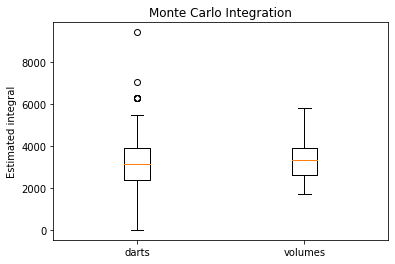

In [ ]:
fig, ax = plt.subplots()
ax.boxplot([dart_estimates, vol_estimates], labels=['darts','volumes'])
ax.set_title('Monte Carlo Integration')
ax.set_ylabel('Estimated integral')

fig.show()

2) [14 points] Consider a function that is a cousin to the logistic function: 
$$
\frac{dx}{dt}=ax(1-x^{2})
$$
With initial condition $x=x_0$  at $t=0$.

a)	Solve the differential equation.  You should get $x=f(t)$ and use the initial condition to solve for the constant. [3 pts]



$$
\begin{aligned}
\int \frac{1}{x(1-x^2)} \: dx &= a \int dt \\
\int \frac{1}{(x-x^3)} \: dx &= at + c_0 \\
\int \frac{1}{x^3(\frac{1}{x^2}-1)} \: dx &= at + c_0 \\ \\
\text{Let} \: u =\frac{1}{x^2}-1 \implies \frac{du}{dx} &= \frac{-2}{x^3} \implies dx = \frac{x^3 du}{-2} \\ \\
\int \frac{x^3}{-2x^3(u)} \: du &= at + c_0 \\
\frac{-1}{2}\int \frac{1}{u} \: du &= at + c_0 \\
\int \frac{1}{u} \: du &= -2at + c_1 \\ \\
\ln |u| &= -2at + c_2 \\
\ln |\frac{1}{x^2}-1| &= -2at + c_2 \\ \\
\frac{1}{x^2}-1 &= e^{-2at + c_2} = e^{-2at}e^{c_2} = Ke^{-2at}\\
\frac{1}{x^2} &= Ke^{-2at} + 1 \\
x^2 &= \frac{1}{Ke^{-2at} + 1} \\ \\
x &= \pm \sqrt\frac{1}{Ke^{-2at} + 1}
\end{aligned}
$$

Now solve the IVP, i.e. $f(0) = x_0$.
* $t=0 \implies Ke^0 = K$

$$
\begin{aligned}
x_0 &= \pm \sqrt \frac{1}{K + 1} \\ \\
x_0^2 &= \frac{1}{K + 1} \\ \\
K+1 &= \frac{1}{x_0^2} \\ \\
K &= \frac{1}{x_0^2} - 1 = \frac{1-x_0^2}{x_0^2}
\end{aligned}
$$

Finally, substitute $K$ to obtain $x = f(t)$:

$$
\begin{aligned}
x &= \pm \sqrt\frac{1}{Ke^{-2at} + 1} \\ \\
x &= \pm \sqrt\frac{1}{1 + (\frac{1-x_0^2}{x_0^2})e^{-2at}}
\end{aligned}
$$

Restrict to the positive range and simplify the radical:

$$
\begin{aligned}
x &= \sqrt\frac{1}{1 + (\frac{1-x_0^2}{x_0^2})e^{-2at}} \\ \\
x &= \frac{1}{\sqrt{1 + (\frac{1-x_0^2}{x_0^2})e^{-2at}}} \\ \\
x &= \bigg[1 + \bigg(\frac{1-x_0^2}{x_0^2}\bigg)e^{-2at}\bigg]^{-1/2}
\end{aligned}
$$

b)	Use Python to plot the function $x=f(t)$  with $x_0=0.1$ and $0≤t≤5$ for $a=1,2,3,$and $4$. Plot all four curves on the same axes. [3 pts]

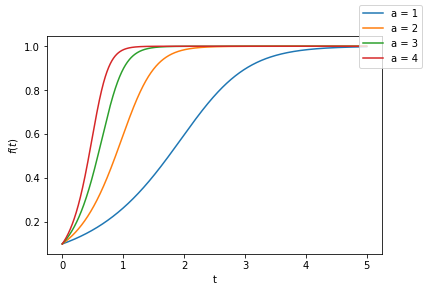

In [ ]:
def f(t, a, x0):
  K = (1-x0**2)/x0**2
  return 1/np.sqrt(1+K*np.exp(-2*a*t))

a_vals = range(1,5)
t_vals = np.arange(5, step=0.0001)

fig, ax = plt.subplots()

for i in range(1, 5):
  y = f(t_vals, i, x0=0.1)
  ax.plot(t_vals, y, label='a = {}'.format(i))

ax.set_xlabel('t')
ax.set_ylabel(r'$f(t)$')

fig.legend()
fig.show()

This differential equation is a bit different from the logistics map although it has some of the same characteristics.  For the rest of this problem, use Euler’s method and simulation to provide a closer examination of some of these similarities and differences. In each case use $x_{0} = 0.5$.

c)	Provide a single iteration plot with a = 2, 2.1, and 2.25 for 50 iterations. [2 pts]

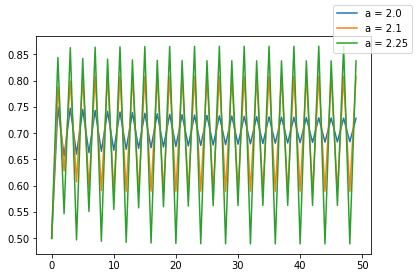

In [ ]:
def euler(x, a):
    return a*x*(1-x**2) + x

x0 = 0.5
a_vals = np.array([2, 2.1, 2.25])
iters = 50

xs = np.empty((len(a_vals), iters))

xs[:,0] = x0

fig, ax = plt.subplots()

for i in range(1, iters):
  xs[:,i] = euler(xs[:,i-1], a_vals)
  
for i, a in enumerate(a_vals):
  ax.plot(xs[i], label='a = {}'.format(a))

fig.legend()
plt.show()




d) provide a single iteration plot with a = 2.598 and 2.5981 for 1,000 iterations.  How are these different from the iteration plots of the logistic map? [3 pts]

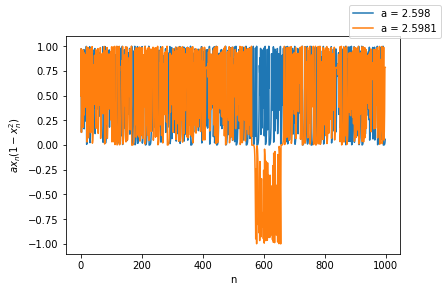

In [ ]:
a_vals = np.array([2.598, 2.5981])
iters = 1000

xs = np.empty((len(a_vals), iters))

xs[:,0] = x0

fig, ax = plt.subplots()

for i in range(1, iters):
  xs[:,i] = euler(xs[:,i-1], a_vals)
  
for i, a in enumerate(a_vals):
  ax.plot(xs[i], label='a = {}'.format(a))

ax.set_xlabel('n')
ax.set_ylabel(r'$ax_n(1-x_n^2)$')

fig.legend()
plt.show()

e)	Provide a return map with 5,000 iteration for each of a = 2.398 and 2.3981. [3 pts]

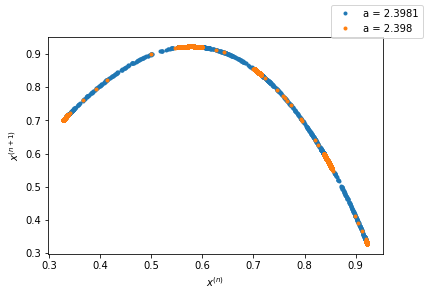

In [ ]:
a_vals = np.array([2.3981, 2.398])
iters = 5000

xs = np.empty((len(a_vals), iters))

xs[:,0] = x0

fig, ax = plt.subplots()

for i in range(1, iters):
  xs[:,i] = euler(xs[:,i-1], a_vals)
  
for i, a in enumerate(a_vals):
  ax.plot(xs[i,:-1], xs[i,1:], '.', label='a = {}'.format(a))

ax.set_xlabel(r'$x^{(n)}$')
ax.set_ylabel(r'$x^{(n+1)}$')

fig.legend()
plt.show()

f)	Finally, provide a phase map with $a$ on the horizontal axis and $x(n)$ on the verticle axis.  Use values for $a$ from 2 to 3 in steps of 0.001. For each value of $a$, ignore the first 100 iterations and plot the 1,900 iterations after that.  In your plot use a marker size of 0.01 (alpha = 0.01) so that the structure of the result can be seen. [3 pts]

In [ ]:
np.arange(2, 3, 0.5)

array([2. , 2.5])

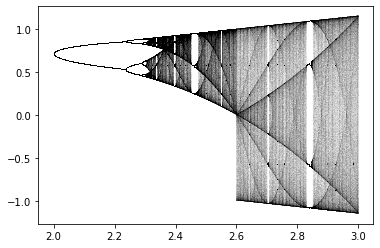

In [ ]:
a_vals = np.arange(2, 3, 0.001)
iters = 2000
ignore_first = 100

fig, ax = plt.subplots()
x = np.ones(len(a_vals)) * x0

for i in range(iters):
    x = euler(x, a_vals)
    if i > ignore_first:
      ax.plot(a_vals, x, ',k', alpha=0.01)

3) [10 points] This problem demonstrates a variety of chaotic outcomes. Consider an ecosystem with rabbits and foxes.  The fraction of the maximum number of rabbits in generation $n+1$ is based on the fraction of the maximum number of rabbits $r_n$ and foxes $f_n$ in the previous generation $n$ and is given by:
$$
r_{n+1}=ar_{n}(1-r_n -f_n)
$$

Since $r_n$  and $f_n$ are fractions, $0\leq r_n \leq 1$ and $0≤f_n≤1$. The constant $a$ is the rabbits’ birth rate. For example, if $a=3$, then each rabbit produces 3 offspring in the next generation. The factor $(1-r_n-f_n )$ accounts for deaths due to starvation and predation. If the number of rabbits is low (meaning $r_n$ is near 0), then few will die of starvation, if it’s high (meaning $r_n$ is near 1) then many will. Likewise, if the number of foxes is low, few rabbits will be “eaten” and if it is high, many rabbits will die from being eaten.

The number of foxes in the next generation is given by:
$$f_{n+1}=br_n f_n$$

One way you can interpret this is the chances that a fox encounters and eats a rabbit is $r_n$. So, if the rabbit population is at 80% of its theoretical maximum, 80% of foxes will eat enough to reproduce, and will produce b offspring.

Create a simulation for $r_n$ and $f_n$ for the values of $a$ and $b$ below. Use $r_0=0.25$ and $f_n=0.25$. Iterate 100,000 times.

Create a return map for the rabbits and the foxes with a = 2, b = 3. Connect the dots so it will be easier to see the convergence. [10 pts]



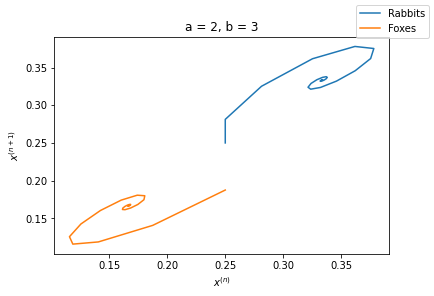

In [ ]:
def rabbit(r, f, a):
    return a*r*(1-r-f)

def fox(f, r, b):
    return b*r*f

iters = 100000

rs = np.empty(iters)
fs = np.empty_like(rs)

r0 = 0.25
f0 = 0.25

a = 2
b = 3

rs[0] = r0
fs[0] = f0

for i in range(1, iters):
    rs[i] = rabbit(rs[i-1], fs[i-1], a)
    fs[i] = fox(fs[i-1], rs[i-1], b)

fig, ax = plt.subplots()

ax.plot(rs[:-1], rs[1:], label='Rabbits')
ax.plot(fs[:-1], fs[1:], label='Foxes')

ax.set_xlabel(r'$x^{(n)}$')
ax.set_ylabel(r'$x^{(n+1)}$')
ax.set_title('a = {}, b = {}'.format(a, b))

fig.legend()
fig.show()